<a href="https://colab.research.google.com/github/Rubylena/Quiz1/blob/main/Time_series_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet
from sklearn import metrics

Exploration

In [ ]:
url = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
electric_data = pd.read_csv(url, encoding = 'latin-1')
electric_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
# Convert FullDate column into Date time
electric_data['FullDate'] = pd.to_datetime(electric_data['FullDate'])

In [ ]:
# Set FullDate as an index
electric_data.set_index('FullDate', inplace = True)

Text(0.5, 1.0, 'Electricity Price over a time')

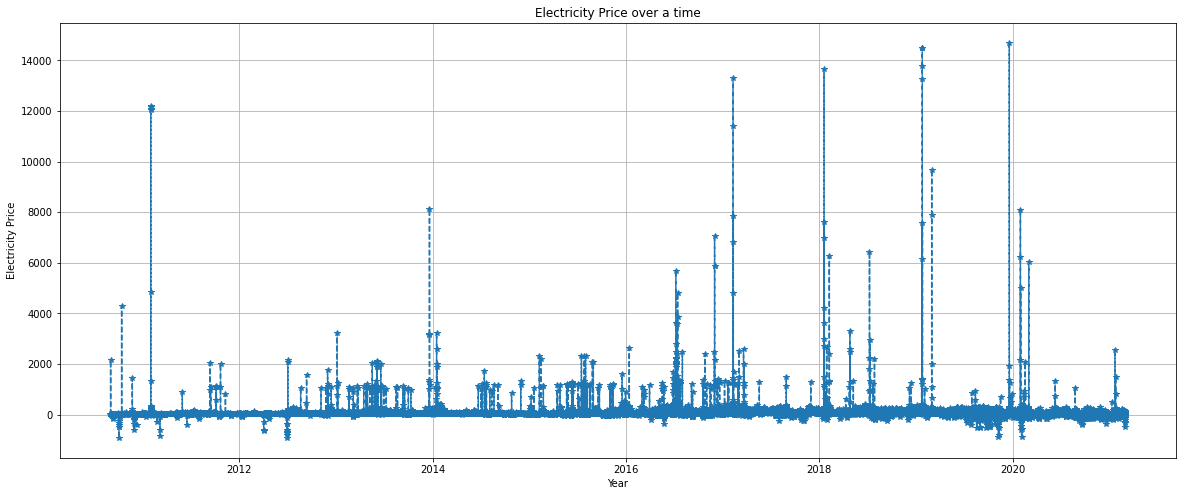

In [ ]:
plt.figure(figsize= (20,8) )
plt.plot(electric_data.index, electric_data.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time')

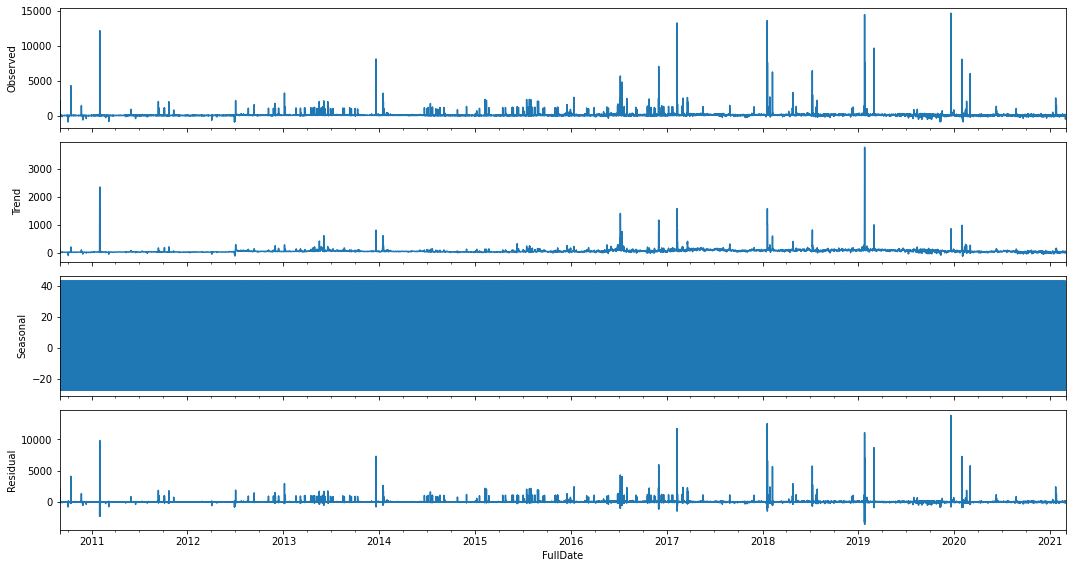

In [ ]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(electric_data['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

Downsampling

In [ ]:
quarterly_sample_rate = electric_data.resample('3M').sum()
quarterly_sample_rate.head(2)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-30,12172.8,1136264.990,2576.6376,18054.645
2010-12-31,53280.0,2914291.854,5541.6528,45872.860


Text(0.5, 1.0, 'Electricity Price over a time (sampled Data)')

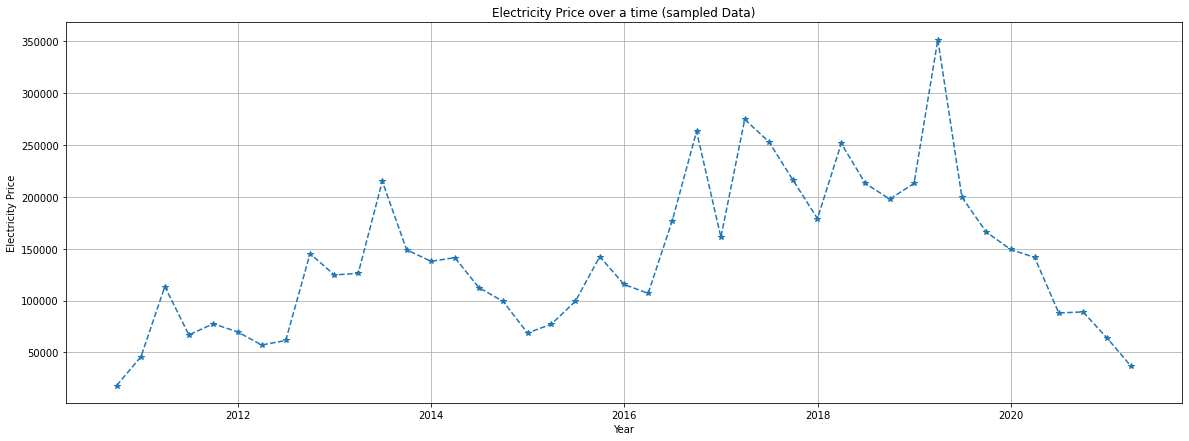

In [ ]:
plt.figure(figsize= (20,7) )
plt.plot(quarterly_sample_rate.index, quarterly_sample_rate.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time (sampled Data)')

Upscaling

In [ ]:
daily_sample_rate = electric_data.resample('D').sum()
daily_sample_rate.head(2)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.70
2010-09-02,369.6,38898.99,88.56,570.81


Text(0.5, 1.0, 'Electricity Price over a time (sampled Data)')

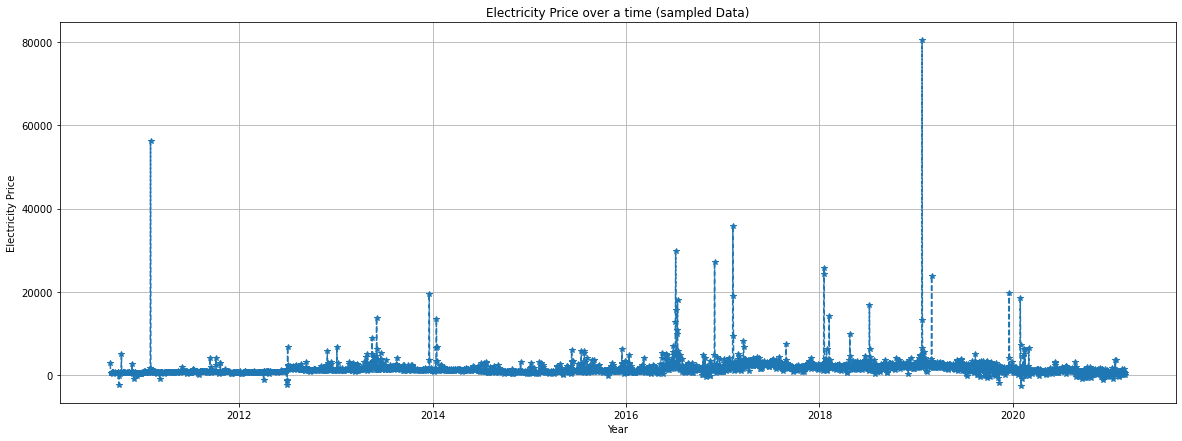

In [ ]:
plt.figure(figsize= (20,7) )
plt.plot(daily_sample_rate.index, daily_sample_rate.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time (sampled Data)')

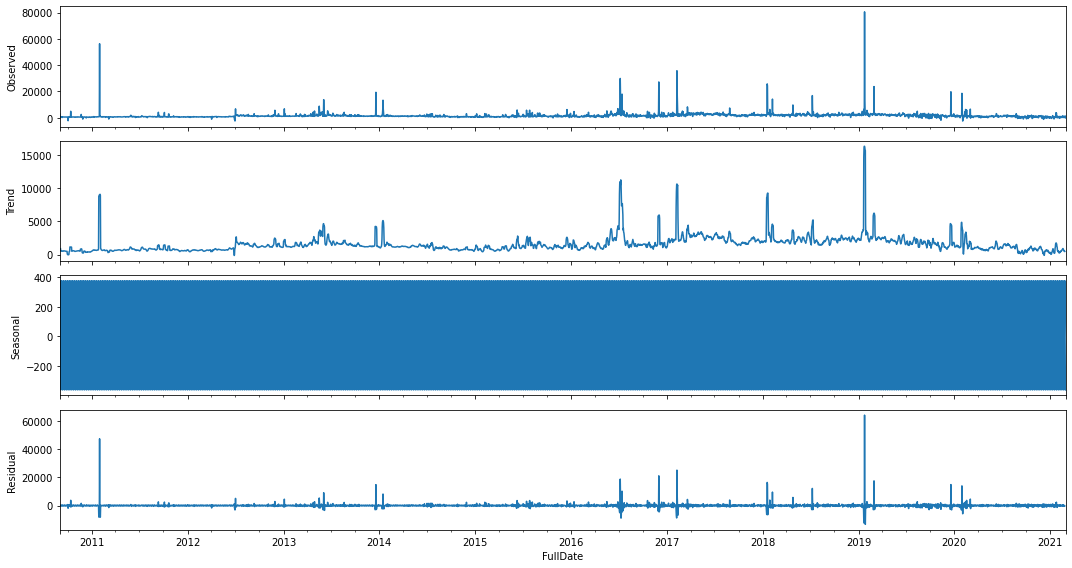

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(daily_sample_rate['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

ADF test

In [ ]:
# Display the information of ADF test
def display_adfuller_info(adfull):
  print(f'ADF Statistic: {adfull[0]}')
  print(f'p-value: {adfull[1]}')
  print(f'No. of lags used: {adfull[2]}')
  print(f'No. of observations used : {adfull[3]}')
  print('Critical Values:')
  for k, v in adfull[4].items():
      print(f' {k}: {v}')

In [ ]:
sys_load = adfuller(daily_sample_rate['SysLoad'])

display_adfuller_info(sys_load)

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [ ]:
gas_price = adfuller(daily_sample_rate['GasPrice'])

display_adfuller_info(gas_price)

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [ ]:
elec_price = adfuller(daily_sample_rate['ElecPrice'])

display_adfuller_info(elec_price)

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.432066157296446
 5%: -2.8622983040036005
 10%: -2.5671736550459663


In [ ]:
print(f'SysLoad p-value is : {round(sys_load[1],6)}')
print(f'GasPrice p-value is : {round(gas_price[1],6)}')

SysLoad p-value is : 0.004254
GasPrice p-value is : 0.045027


In [ ]:
print(f'10% critical values of GasPrice is : {round(gas_price[4]["10%"],4)}')
print(f'5% critical values of ElecPrice is : {round(elec_price[4]["5%"],4)}')

10% critical values of GasPrice is : -2.5672
5% critical values of ElecPrice is : -2.8623


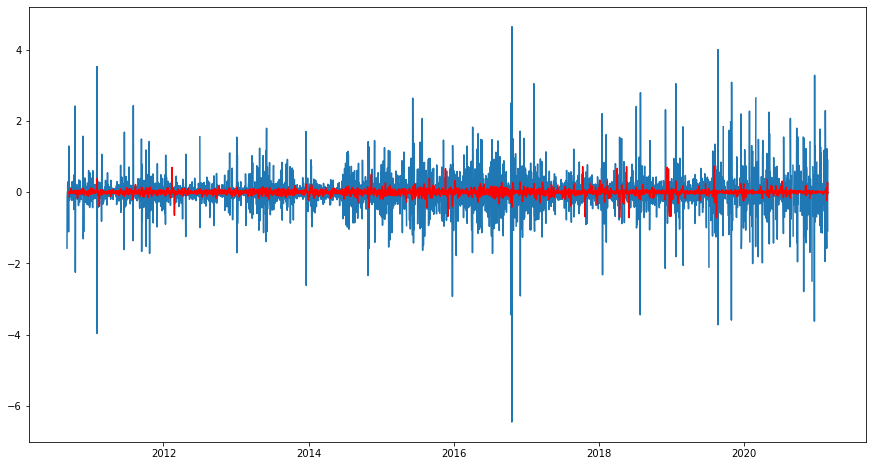

In [ ]:
# Log Transformation and Differencing
df_log = np.log(daily_sample_rate)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

In [ ]:
# Split the daily sampled rate into train and test 
train_data = daily_sample_rate.iloc[:2757,:]
test_data = daily_sample_rate.iloc[2757:,:]
train_data.shape , test_data.shape

((2757, 4), (1077, 4))

In [ ]:
# Reset the index
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
# Rename the columns
df_train = train_data.iloc[:,[0,-1]]
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
# Reset the index
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [ ]:
# Rename the columns
test_df = test_data.iloc[:,[0,-1]]
test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [ ]:
# Model Implementation
model = Prophet()
model.fit(df_train)
forecast_result = model.predict(test_df) 
forecast_result.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,166.473254,4963.352466,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,321.996022,5137.601722,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,346.650514,5215.538383,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,148.229952,4892.816488,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-38.568997,4565.083167,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


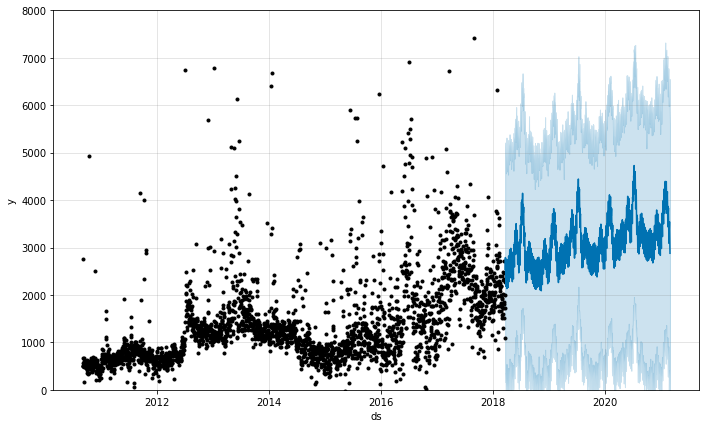

In [ ]:
model.plot(forecast_result)
plt.ylim(0,8000)
plt.show()

In [ ]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [ ]:
MAPE = Metric(test_df['y'],forecast_result['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is: 549.48


In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(test_df['y'],forecast_result['yhat']))
print(f'The Root Mean Square Error (RMSE) is: {round(RMSE,2)}')

The Root Mean Square Error (RMSE) is: 3218.16


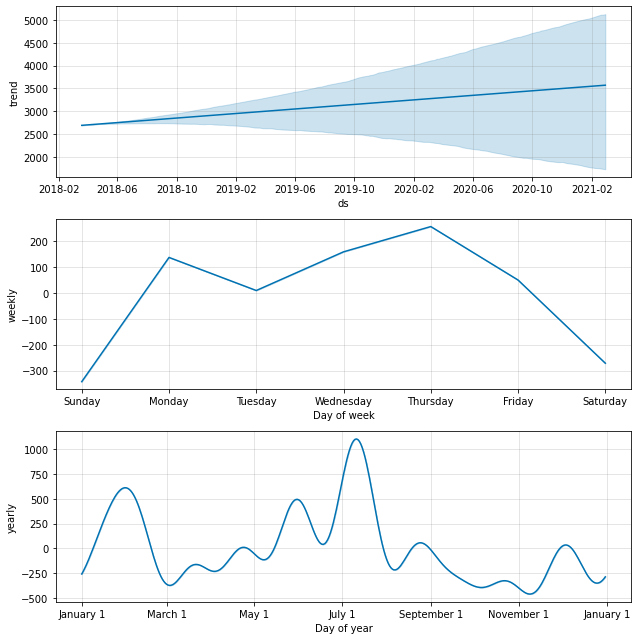

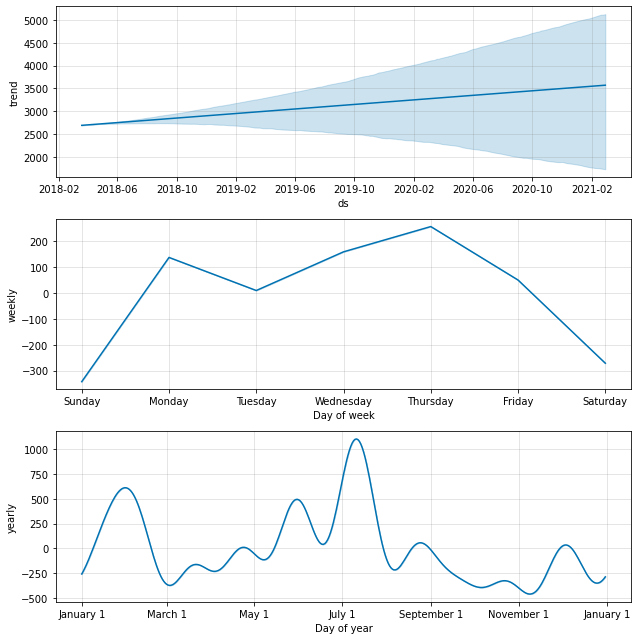

In [ ]:
model.plot_components(forecast_result)

In [ ]:
# Reset the index
daily_sample_rate.reset_index(inplace=True)
daily_sample_rate.head(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [ ]:
# Rename the columns
dsr = daily_sample_rate.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})
dsr.head(3)

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [ ]:
# Split the dataset
train_dsr = dsr.iloc[:2757,:]
test_dsr = dsr.iloc[2757:,:]
# Model implementation
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model = model.fit(train_dsr)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_new_result = model.predict(test_dsr)

In [ ]:
MAPE = Metric(test_dsr['y'],forecast_new_result['yhat'])
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE,2)}')

The Mean Average Percentage Error (MAPE) is: 233.74


In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(test_dsr['y'],forecast_new_result['yhat']))
print(f'The Root Mean Square Error (RMSE) is: {round(RMSE,2)}')

The Root Mean Square Error (RMSE) is: 2709.65


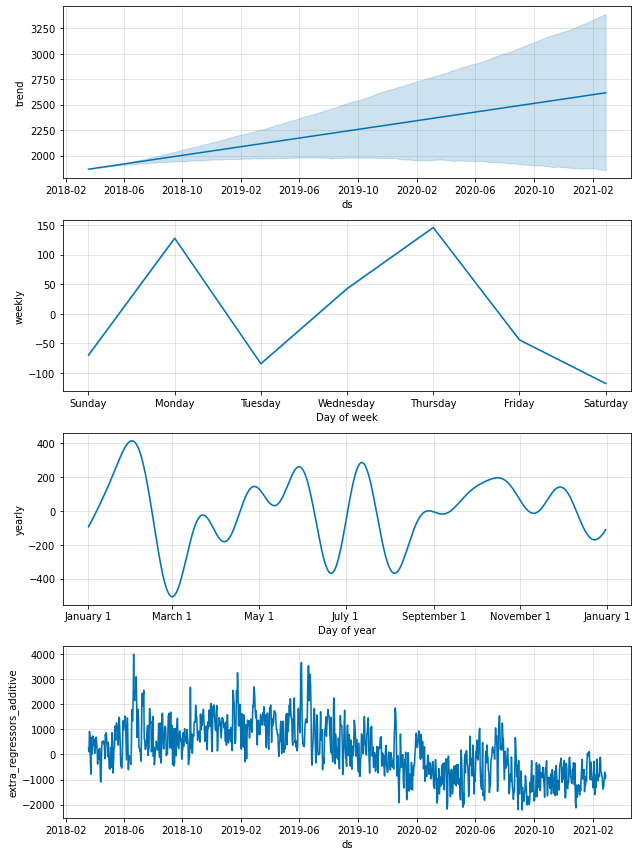

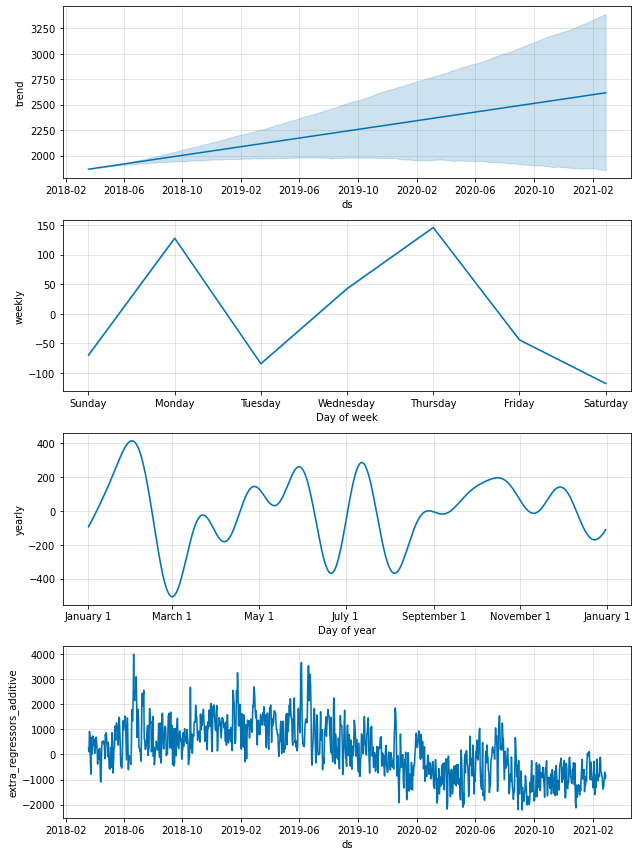

In [ ]:
model.plot_components(forecast_new_result)

In [ ]:
daily_sample_rate.head(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [ ]:
# Split the dataset
trainData = daily_sample_rate.iloc[:2757,:]
testData = daily_sample_rate.iloc[2757:,:]
trainData.shape , testData.shape

((2757, 5), (1077, 5))

In [ ]:
# Exclude the Tmax 
train_df = trainData.iloc[:,[0,2,3,4]]
test_df = testData.iloc[:,[0,2,3,4]]
# Rename the columns
train_df = train_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
test_df = test_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
train_df.head(2)

,ds,add1,add2,y
0,2010-09-01,41565.38,88.56,2751.70
1,2010-09-02,38898.99,88.56,570.81


In [ ]:
# Model Implementation
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model = model.fit(train_df)
forecast_values_new = model.predict(test_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
MAPE = Metric(test_df['y'],forecast_values_new['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is:236.66


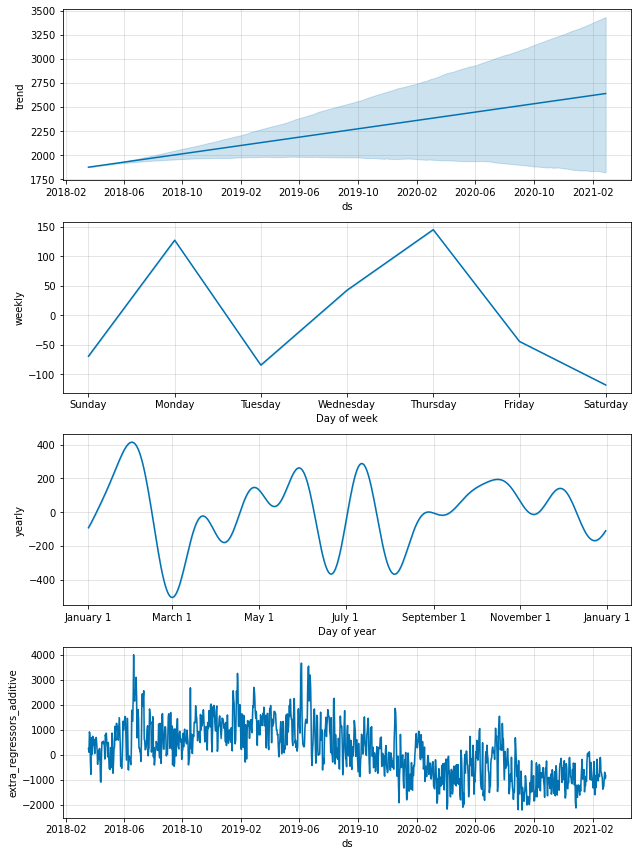

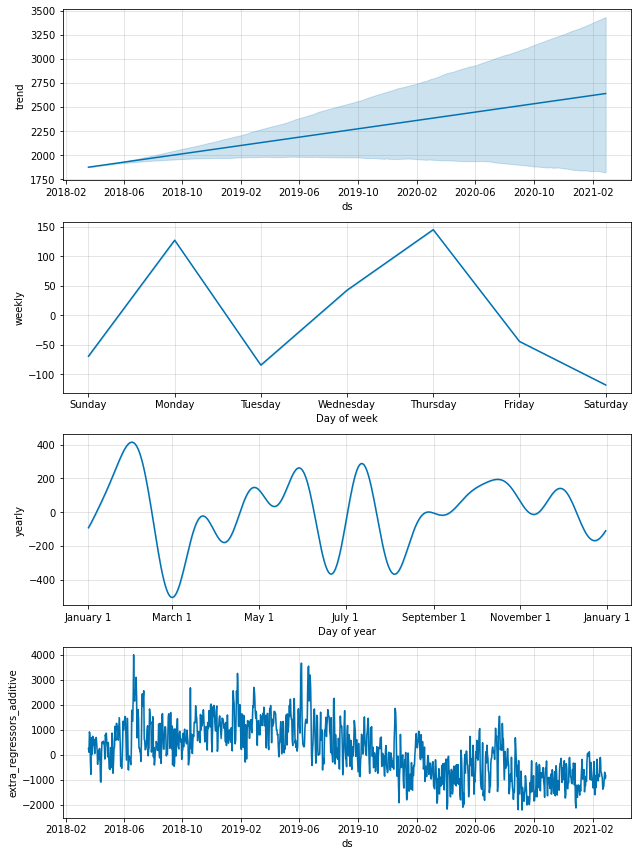

In [ ]:
model.plot_components(forecast_values_new)